In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
raw_data_intakes_outcomes = pd.read_csv("aac_intakes_outcomes.csv")
data_intakes_outcomes = raw_data_intakes_outcomes.copy()
data_intakes_outcomes.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [3]:
len(data_intakes_outcomes)

79672

In [4]:
# Check null values in the data set

data_intakes_outcomes.isnull().sum()

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43324
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_id_intake                  0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake             

In [5]:
#Checking the unique values in the different columns

#data_intakes_outcomes['outcome_subtype'].unique()
data_intakes_outcomes['outcome_type'].unique()


array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [6]:
data_intakes_outcomes['outcome_subtype'] = data_intakes_outcomes['outcome_subtype'].fillna('Not Specified')
data_intakes_outcomes['outcome_subtype']

0        Not Specified
1        Not Specified
2        Not Specified
3              Partner
4        Not Specified
             ...      
79667          Partner
79668      Rabies Risk
79669      Rabies Risk
79670    Not Specified
79671        Suffering
Name: outcome_subtype, Length: 79672, dtype: object

In [7]:
data_cleaned = data_intakes_outcomes.dropna()
data_cleaned.isnull().sum()

age_upon_outcome              0
animal_id_outcome             0
date_of_birth                 0
outcome_subtype               0
outcome_type                  0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_year                  0
outcome_monthyear             0
outcome_weekday               0
outcome_hour                  0
outcome_number                0
dob_year                      0
dob_month                     0
dob_monthyear                 0
age_upon_intake               0
animal_id_intake              0
animal_type                   0
breed                         0
color                         0
found_location                0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon

In [8]:
data_cleaned['date_of_birth']

0        2007-07-09 00:00:00
1        2007-07-09 00:00:00
2        2007-07-09 00:00:00
3        2004-04-02 00:00:00
4        1997-10-16 00:00:00
                ...         
79667    2018-03-14 00:00:00
79668    2016-03-29 00:00:00
79669    2017-03-29 00:00:00
79670    2017-05-01 00:00:00
79671    2008-03-29 00:00:00
Name: date_of_birth, Length: 79661, dtype: object

In [9]:
data_cleaned = data_cleaned.drop([
    'age_upon_outcome',
    'animal_id_outcome',
    'date_of_birth',
    'sex_upon_outcome',
    'age_upon_outcome_(years)',
    'age_upon_outcome_age_group',
    'outcome_datetime',
    'outcome_month',
    'outcome_year',
    'outcome_monthyear',
    'outcome_weekday',
    'outcome_hour',
    'outcome_number',
    'dob_year',
    'dob_month',
    'dob_monthyear',
    'age_upon_intake',
    'animal_id_intake',
    'count',
    'age_upon_intake_(years)',
    'age_upon_intake_age_group',
    'intake_datetime',
    'intake_month',
    'intake_year',
    'intake_monthyear',
    'intake_weekday',
    'intake_hour',
    'intake_number',
    'time_in_shelter',
    'found_location'
], axis=1)

In [10]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [11]:
data_cleaned['breed'].nunique()

2155

In [12]:
data_cleaned.dtypes

outcome_subtype             object
outcome_type                object
age_upon_outcome_(days)      int64
animal_type                 object
breed                       object
color                       object
intake_condition            object
intake_type                 object
sex_upon_intake             object
age_upon_intake_(days)       int64
time_in_shelter_days       float64
dtype: object

In [13]:
data_cleaned['breed']

0          Spinone Italiano Mix
1          Spinone Italiano Mix
2          Spinone Italiano Mix
3                     Dachshund
4             Shetland Sheepdog
                  ...          
79656    Domestic Shorthair Mix
79657                   Bat Mix
79658                   Bat Mix
79659    Labrador Retriever Mix
79660                 Boxer Mix
Name: breed, Length: 79661, dtype: object

In [14]:
data_cleaned['breed'] = data_cleaned['breed'].str.split("/").str[0]

data_cleaned['breed'].unique()

array(['Spinone Italiano Mix', 'Dachshund', 'Shetland Sheepdog',
       'Labrador Retriever', 'Miniature Schnauzer Mix', 'Lhasa Apso Mix',
       'Shetland Sheepdog Mix', 'Domestic Longhair Mix',
       'American Shorthair Mix', 'Dachshund Mix', 'Border Collie Mix',
       'Chihuahua Shorthair', 'German Shepherd', 'Domestic Shorthair',
       'Newfoundland Mix', 'Pug', 'Staffordshire Mix',
       'Labrador Retriever Mix', 'Catahoula', 'Queensland Heeler',
       'Rottweiler', 'Domestic Shorthair Mix', 'Smooth Fox Terrier Mix',
       'Rat Terrier Mix', 'German Shepherd Mix', 'Border Collie',
       'Chihuahua Shorthair Mix', 'Pit Bull', 'Bichon Frise Mix',
       'Jack Russell Terrier Mix', 'Harrier Mix', 'Pointer Mix',
       'American Eskimo Mix', 'Doberman Pinsch Mix',
       'Parson Russell Terrier Mix', 'Pit Bull Mix', 'Siamese',
       'Australian Shepherd Mix', 'Chow Chow',
       'Australian Cattle Dog Mix', 'Miniature Schnauzer', 'Rat Terrier',
       'Siberian Husky Mix', 'Be

In [15]:
data_cleaned['breed'].nunique()

575

In [16]:
data_cleaned['color'].nunique()

529

In [17]:
data_cleaned['color'] = data_cleaned['color'].str.split("/").str[0]

data_cleaned['color'].unique()

array(['Yellow', 'Tricolor', 'Brown', 'Black', 'White', 'Brown Tabby',
       'Tan', 'Gold', 'Sable', 'Blue Merle', 'Gray', 'Cream', 'Red',
       'Gray Tabby', 'Brown Merle', 'Tortie', 'Black Smoke',
       'Orange Tabby', 'Blue Cream', 'Lynx Point', 'Red Merle', 'Calico',
       'Blue', 'Lilac Point', 'Black Brindle', 'Chocolate', 'Blue Point',
       'Silver Tabby', 'Brown Brindle', 'Seal Point', 'Flame Point',
       'Blue Tick', 'Apricot', 'Buff', 'Chocolate Point', 'Black Tabby',
       'Silver', 'Blue Tabby', 'Cream Tabby', 'Torbie', 'Calico Point',
       'Tortie Point', 'Fawn', 'Red Tick', 'Liver', 'Black Tiger',
       'Orange', 'Blue Tiger', 'Yellow Brindle', 'Brown Tiger', 'Green',
       'Blue Smoke', 'Ruddy', 'Pink', 'Agouti', 'Liver Tick',
       'Silver Lynx Point', 'Orange Tiger'], dtype=object)

In [18]:
data_cleaned['color'].nunique()

58

In [19]:
data_cleaned.head()

,outcome_subtype,outcome_type,age_upon_outcome_(days),animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),time_in_shelter_days
0,Not Specified,Return to Owner,3650,Dog,Spinone Italiano Mix,Yellow,Normal,Stray,Neutered Male,3650,0.588194
1,Not Specified,Return to Owner,2555,Dog,Spinone Italiano Mix,Yellow,Normal,Public Assist,Neutered Male,2555,1.259722
2,Not Specified,Return to Owner,2190,Dog,Spinone Italiano Mix,Yellow,Normal,Public Assist,Neutered Male,2190,1.113889
3,Partner,Transfer,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,4.970139
4,Not Specified,Return to Owner,5840,Dog,Shetland Sheepdog,Brown,Injured,Public Assist,Neutered Male,5840,0.119444


Mapping Outputs

In [20]:
data_cleaned['outcome_type'].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', 'Relocate'], dtype=object)

In [21]:
data_cleaned['outcome_type'] = data_cleaned['outcome_type'].map({'Adoption':1})

In [22]:
data_cleaned['outcome_type'] = data_cleaned['outcome_type'].fillna(0)

In [23]:
data_cleaned['outcome_type'].unique()

array([0., 1.])

In [24]:
data_cleaned.head()

,outcome_subtype,outcome_type,age_upon_outcome_(days),animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),time_in_shelter_days
0,Not Specified,0.0,3650,Dog,Spinone Italiano Mix,Yellow,Normal,Stray,Neutered Male,3650,0.588194
1,Not Specified,0.0,2555,Dog,Spinone Italiano Mix,Yellow,Normal,Public Assist,Neutered Male,2555,1.259722
2,Not Specified,0.0,2190,Dog,Spinone Italiano Mix,Yellow,Normal,Public Assist,Neutered Male,2190,1.113889
3,Partner,0.0,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,4.970139
4,Not Specified,0.0,5840,Dog,Shetland Sheepdog,Brown,Injured,Public Assist,Neutered Male,5840,0.119444


In [25]:
data_cleaned.dtypes

outcome_subtype             object
outcome_type               float64
age_upon_outcome_(days)      int64
animal_type                 object
breed                       object
color                       object
intake_condition            object
intake_type                 object
sex_upon_intake             object
age_upon_intake_(days)       int64
time_in_shelter_days       float64
dtype: object

In [26]:
data_cleaned['outcome_type'] = data_cleaned['outcome_type'].astype(np.int64)
data_cleaned.dtypes

outcome_subtype             object
outcome_type                 int64
age_upon_outcome_(days)      int64
animal_type                 object
breed                       object
color                       object
intake_condition            object
intake_type                 object
sex_upon_intake             object
age_upon_intake_(days)       int64
time_in_shelter_days       float64
dtype: object

In [27]:
data_cleaned.describe()

,outcome_type,age_upon_outcome_(days),age_upon_intake_(days),time_in_shelter_days
count,79661.000000,79661.000000,79661.000000,79661.000000
mean,0.421712,782.057230,769.351100,16.758594
std,0.493836,1058.512661,1055.992884,41.681995
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,90.000000,60.000000,1.102778
50%,0.000000,365.000000,365.000000,4.987500
75%,1.000000,1095.000000,1095.000000,13.606250
max,1.000000,9125.000000,9125.000000,1606.194444


Dummy variables

In [28]:
data_dummies = pd.get_dummies(data_cleaned, drop_first=False)
data_dummies.head()

,outcome_type,age_upon_outcome_(days),age_upon_intake_(days),time_in_shelter_days,outcome_subtype_Aggressive,outcome_subtype_At Vet,outcome_subtype_Barn,outcome_subtype_Behavior,outcome_subtype_Court/Investigation,outcome_subtype_Enroute,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,0,3650,3650,0.588194,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,2555,2555,1.259722,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,2190,2190,1.113889,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,3650,3650,4.970139,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,5840,5840,0.119444,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [29]:
data_dummies = data_dummies.reset_index(drop=True)

In [30]:
training_data = data_dummies.sample(frac=0.8, random_state=25)
testing_data = data_dummies.drop(training_data.index)

training_data = training_data.reset_index(drop=True)
testing_data = testing_data.reset_index(drop=True)

In [31]:
train_input = training_data.iloc[:,1:]
train_target = training_data.iloc[:,:1]

test_input = testing_data.iloc[:,1:]
test_target = testing_data.iloc[:,:1]

In [32]:
train_input.head()

,age_upon_outcome_(days),age_upon_intake_(days),time_in_shelter_days,outcome_subtype_Aggressive,outcome_subtype_At Vet,outcome_subtype_Barn,outcome_subtype_Behavior,outcome_subtype_Court/Investigation,outcome_subtype_Enroute,outcome_subtype_Foster,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,365,365,3.118056,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2555,2555,0.338194,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,730,730,1.081250,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,365,270,61.981250,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,330,300,47.123611,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [33]:
train_target.head()

,outcome_type
0,1
1,0
2,1
3,0
4,1


# A decision tree

In [37]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.001)
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

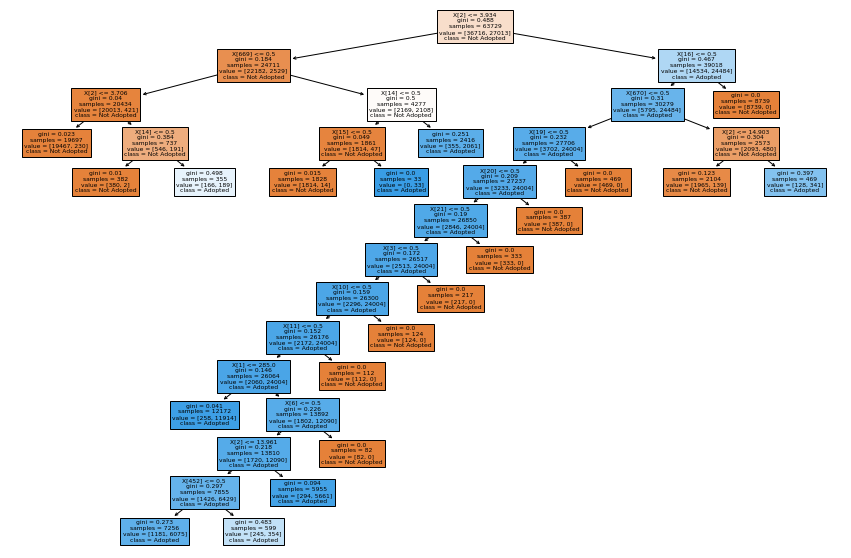

In [42]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True,  
          class_names=["Not Adopted", "Adopted"])
plt.show()

In [39]:
test_pred = clf.predict(test_input)
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9351
           1       0.91      0.99      0.95      6581

    accuracy                           0.95     15932
   macro avg       0.95      0.96      0.95     15932
weighted avg       0.96      0.95      0.95     15932

